In [120]:
library(ggcorrplot)
library(tidyverse)
library(ggfortify)
library(ggthemes)

In [1]:
data(state)
voices = read.csv("datasets/voices/voice.csv", header=TRUE)

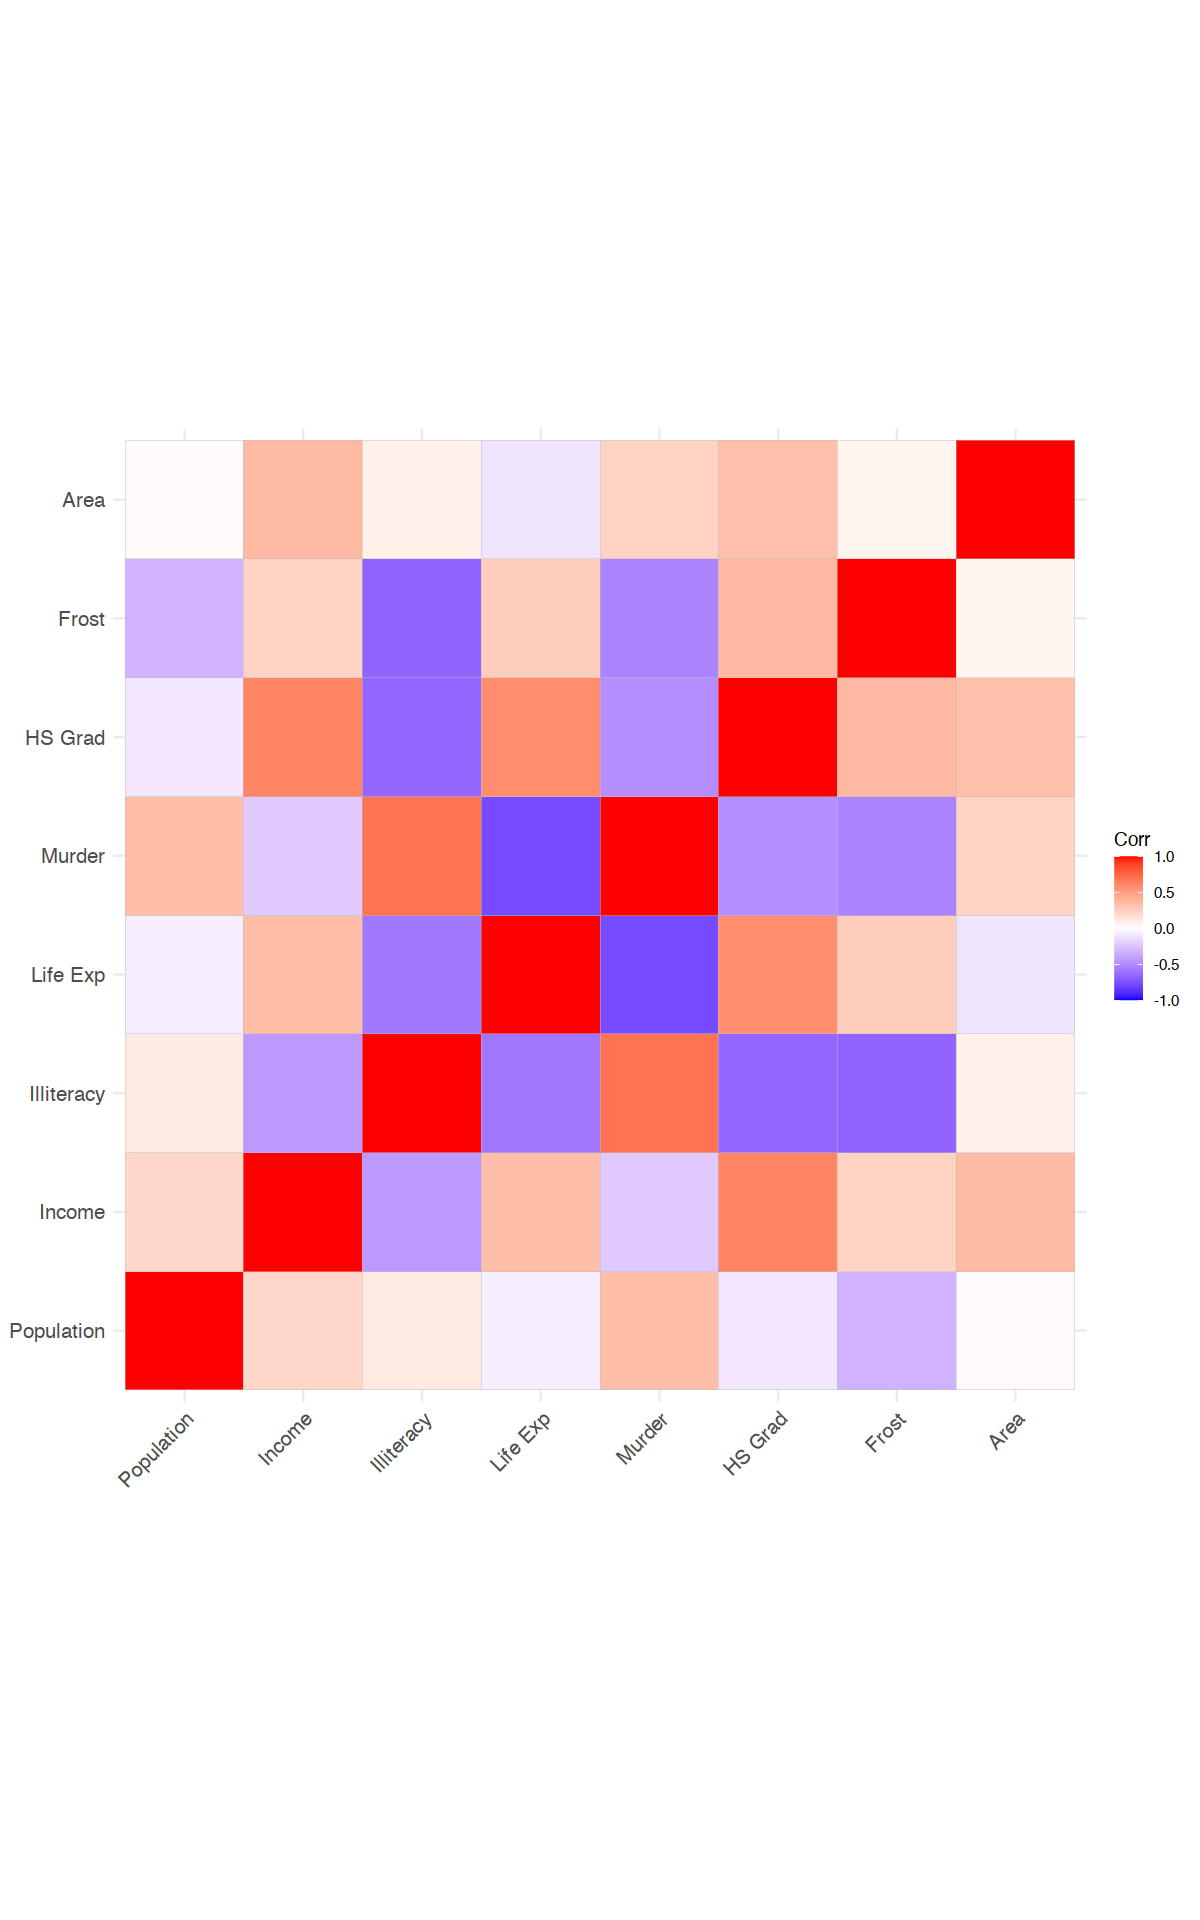

In [22]:
options(repr.plot.width=10, repr.plot.height=16)
ggcorrplot(cor(state.x77))

### PCA by hand

In [33]:
# first scale and center the datapoints in the dataset
scaled_points = scale(state.x77, center=TRUE, scale=TRUE)
# find the covariance matrix
covariances = cov(scaled_points)
# find the eigenvectors and eigenvalues
eigenpairs = eigen(covariances)
# find scores (or PCA components)
scores = data.matrix(scaled_points) %*% eigenpairs$vectors

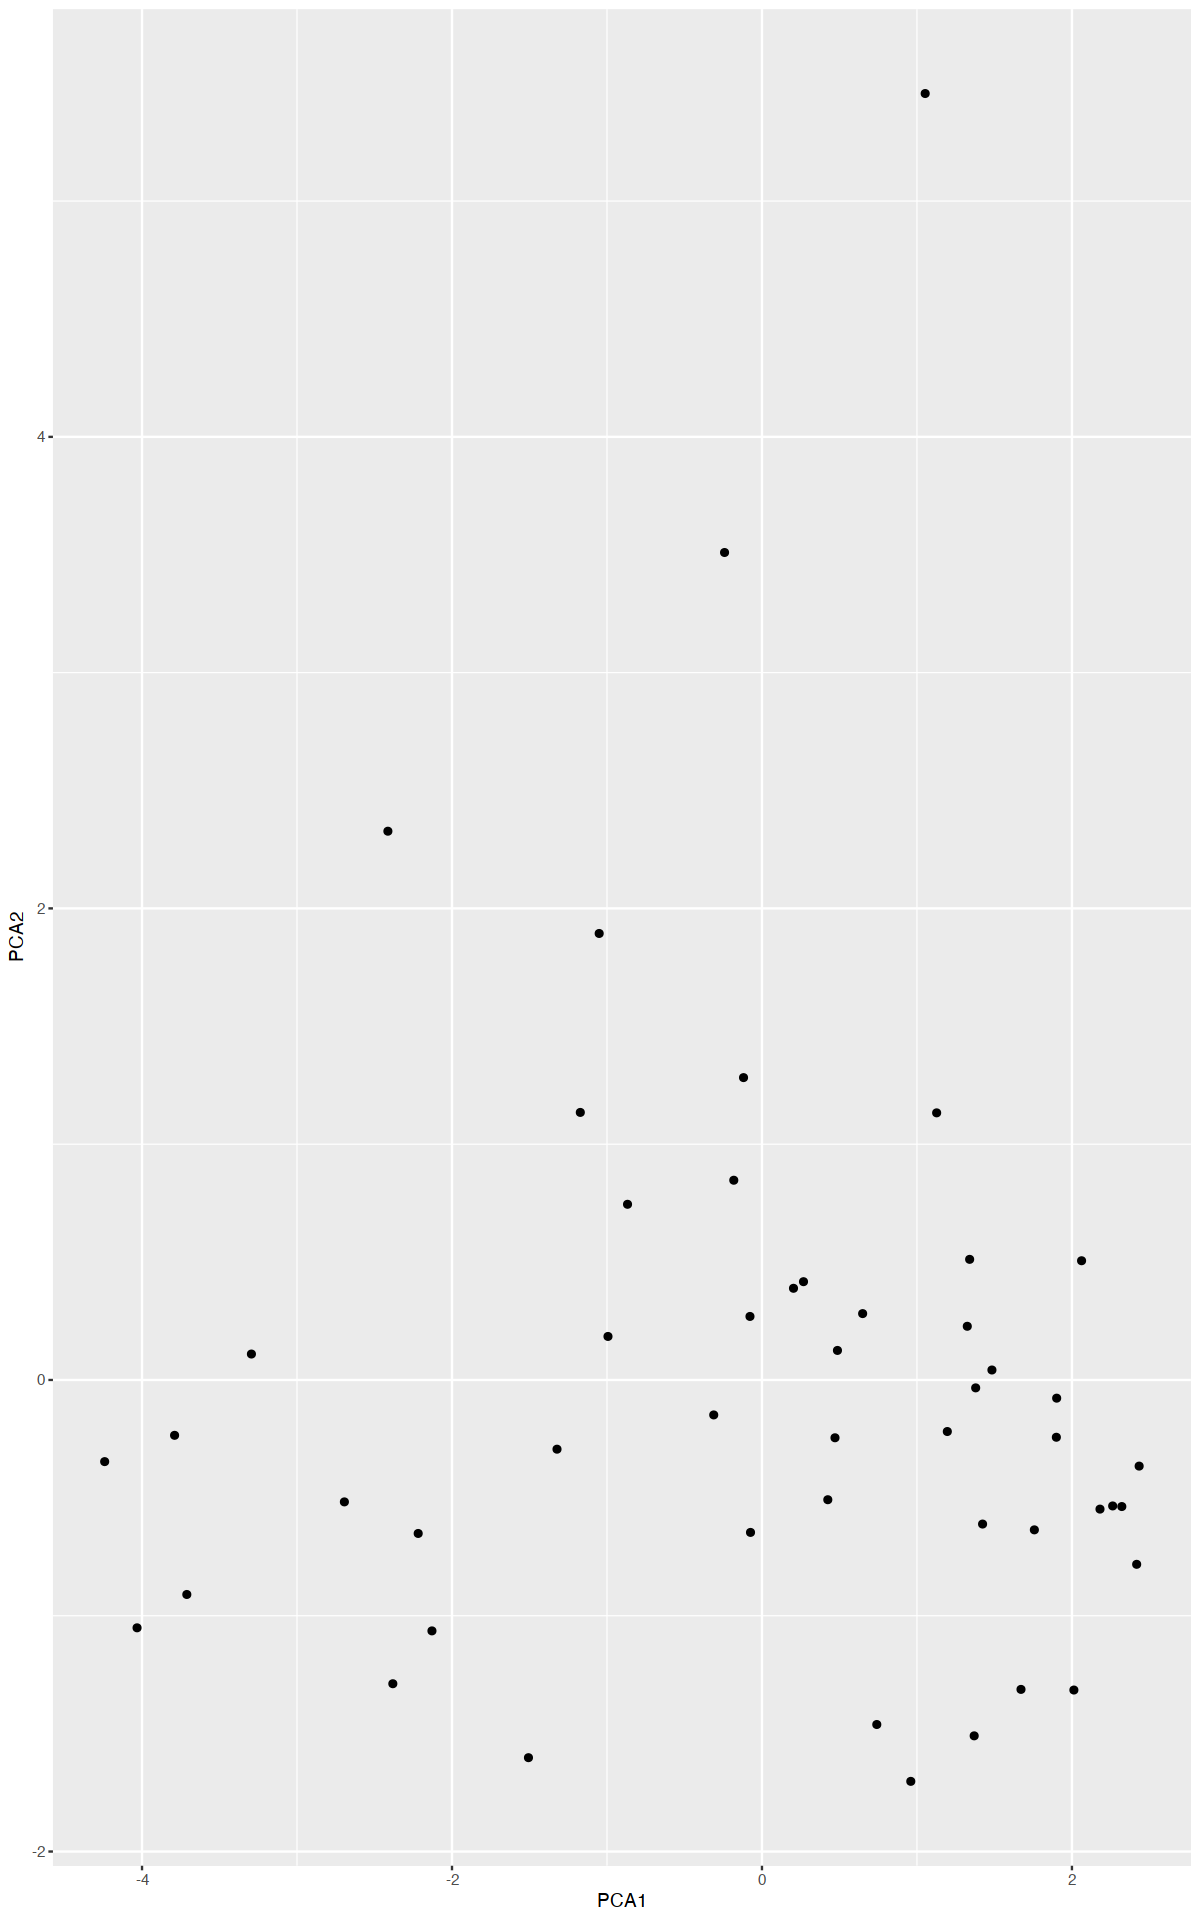

In [53]:
PCAs = data.frame(
    PCA1 = scores[,1],
    PCA2 = scores[,2]
)
ggplot(data=PCAs, aes(PCA1, PCA2)) + geom_point()

In [61]:
proportions = eigenpairs$values/sum(eigenpairs$values)
min(which(cumsum(proportions) > 0.9))

[1] 5

In [70]:
proportions

[1] 0.44986195 0.20398990 0.13899264 0.08843803 0.04808021 0.03843271 0.01805610
[8] 0.01414846

### Using built-in functions

In [68]:
pca = prcomp(state.x77, scale=TRUE, center=TRUE)

In [65]:
eigenpairs

eigen() decomposition
$values
[1] 3.5988956 1.6319192 1.1119412 0.7075042 0.3846417 0.3074617 0.1444488
[8] 0.1131877

$vectors
            [,1]        [,2]        [,3]        [,4]         [,5]        [,6]
[1,] -0.12642809  0.41087417  0.65632546  0.40938555 -0.405946365 -0.01065617
[2,]  0.29882991  0.51897884  0.10035919  0.08844658  0.637586953  0.46177023
[3,] -0.46766917  0.05296872 -0.07089849 -0.35282802 -0.003525994  0.38741578
[4,]  0.41161037 -0.08165611  0.35993297 -0.44256334 -0.326599685  0.21908161
[5,] -0.44425672  0.30694934 -0.10846751  0.16560017  0.128068739 -0.32519611
[6,]  0.42468442  0.29876662 -0.04970850 -0.23157412  0.099264551 -0.64464647
[7,]  0.35741244 -0.15358409 -0.38711447  0.61865119 -0.217363791  0.21268413
[8,]  0.03338461  0.58762446 -0.51038499 -0.20112550 -0.498506338  0.14836054
             [,7]        [,8]
[1,] -0.062158658  0.21924645
[2,]  0.009104712 -0.06029200
[3,] -0.619800310  0.33868838
[4,] -0.256213054 -0.52743331
[5,] -0.295043151 -0

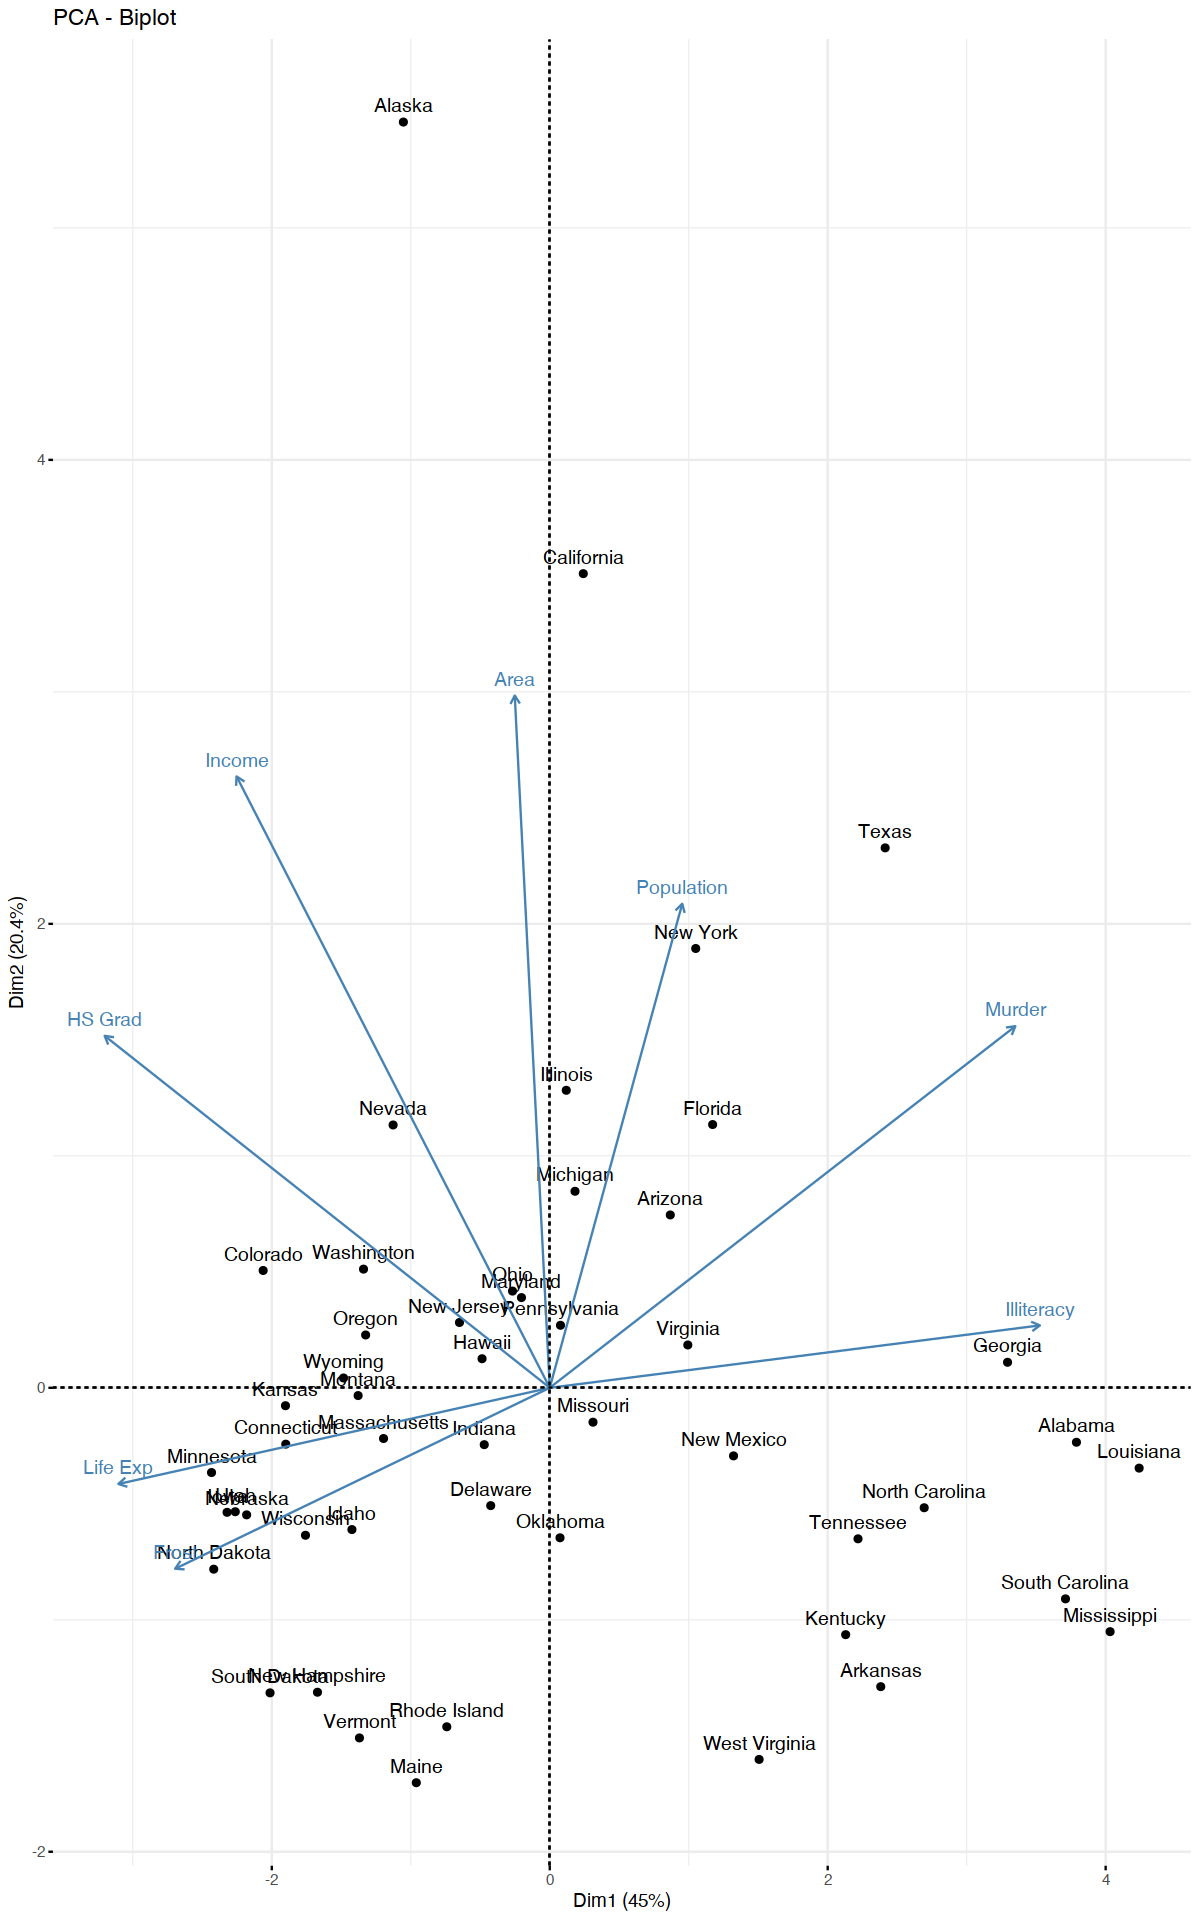

In [69]:
factoextra::fviz_pca_biplot(pca)

In [71]:
pca_non_scaled = prcomp(state.x77, scale=FALSE, center=FALSE)

In [73]:
pca_non_scaled

Standard deviations (1, .., p=8):
[1] 1.113723e+05 5.950612e+03 2.457532e+03 4.640268e+01 9.671482e+00
[6] 5.644522e+00 2.461037e+00 2.908379e-01

Rotation (n x k) = (8 x 8):
                     PC1           PC2           PC3           PC4
Population -2.550770e-02 -0.9082092932  0.4177118118  4.679182e-03
Income     -2.741509e-02 -0.4169303207 -0.9078444028 -2.889047e-02
Illiteracy -7.149741e-06 -0.0001114962 -0.0001923048 -7.018767e-03
Life Exp   -4.125144e-04 -0.0066594026 -0.0150487962  5.436391e-03
Murder     -4.884947e-05 -0.0007614284 -0.0009154506 -2.776271e-02
HS Grad    -3.283506e-04 -0.0047064823 -0.0113669749  2.825484e-02
Frost      -6.304407e-04 -0.0076591124 -0.0278417410  9.987470e-01
Area       -9.992983e-01  0.0346299666  0.0142713208  3.293833e-05
                     PC5           PC6           PC7           PC8
Population  2.803094e-04  0.0002944589  1.373923e-04 -2.384239e-05
Income     -1.956143e-02 -0.0043281262 -1.251878e-04 -5.972863e-05
Illiteracy  3.915118e

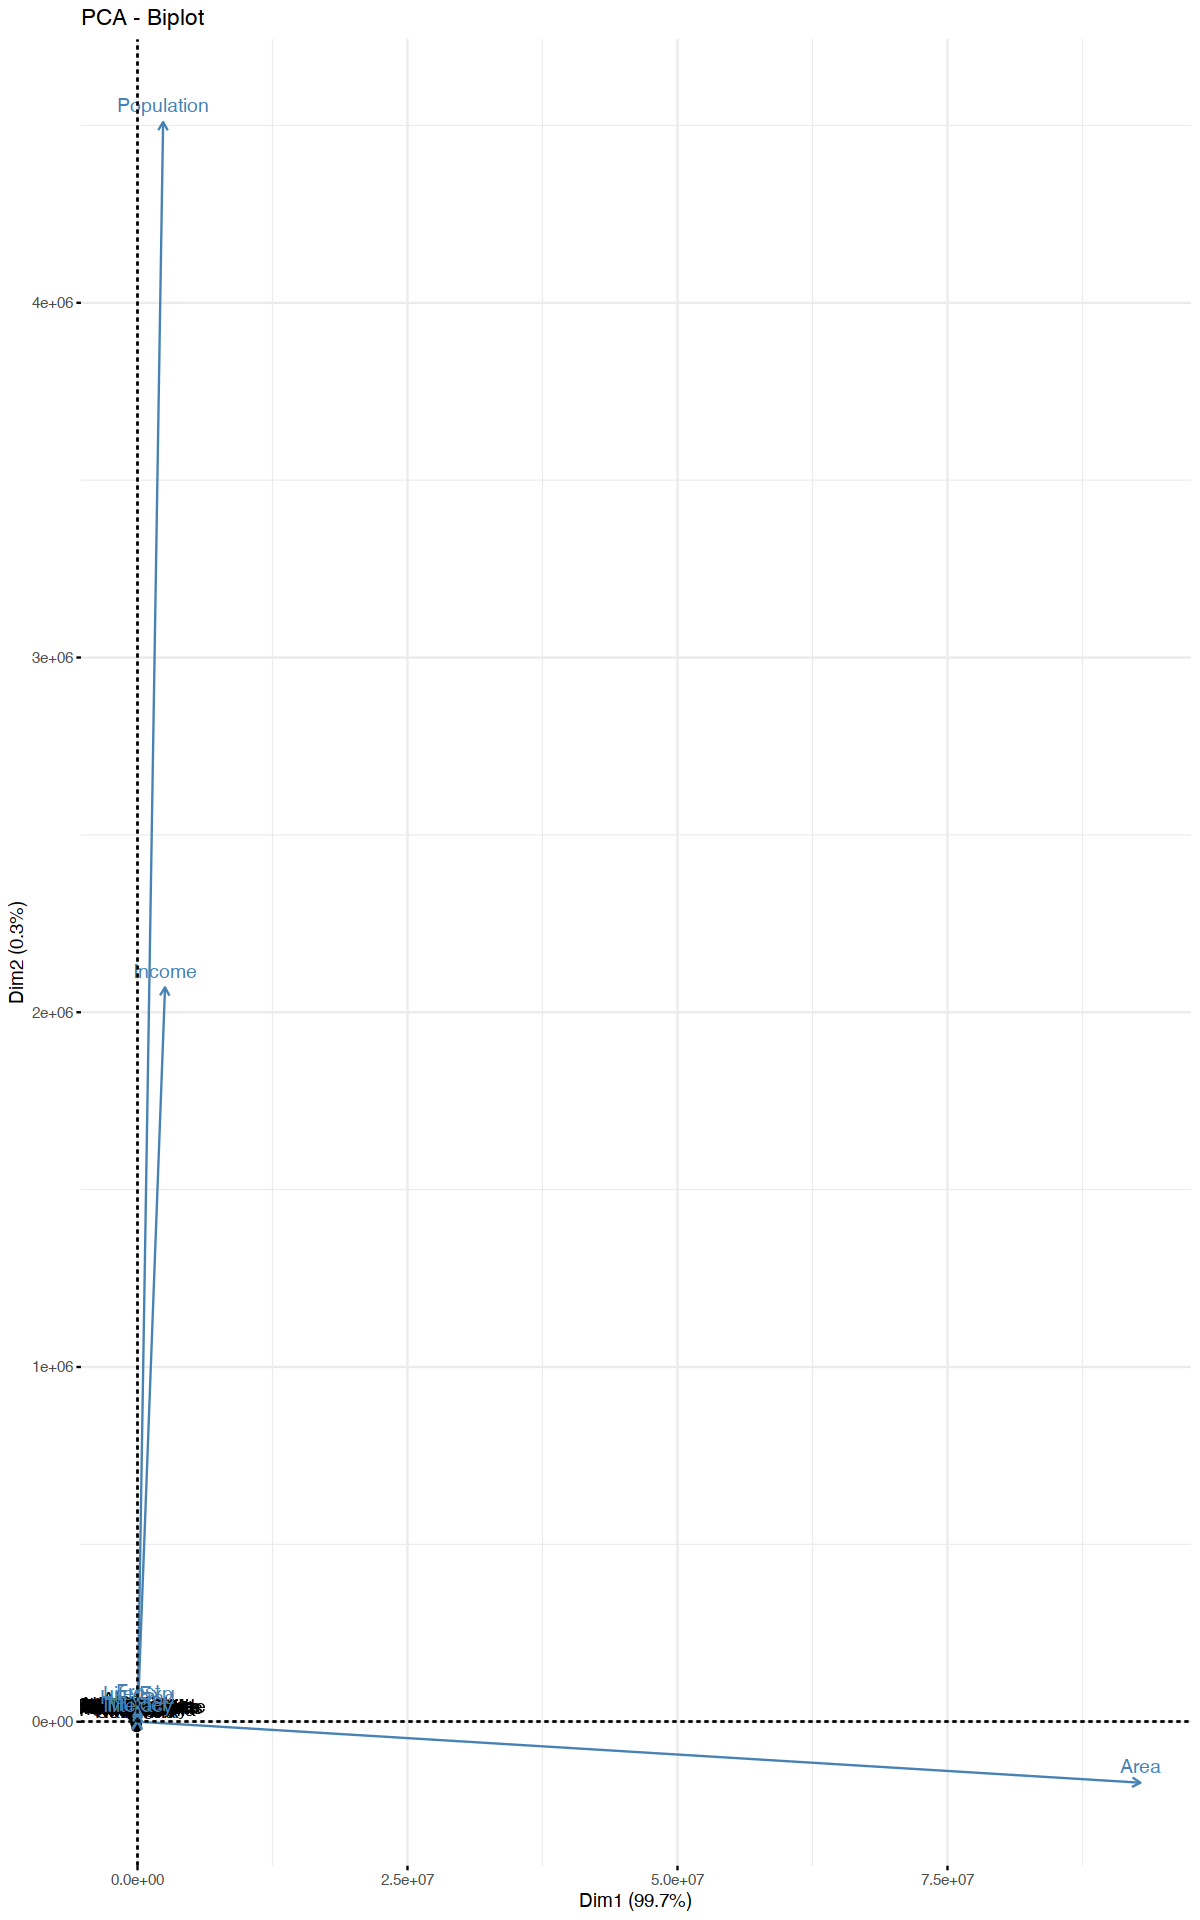

In [72]:
factoextra::fviz_pca_biplot(pca_non_scaled)

### Kaggle voice recognition dataset

In [78]:
v = voices %>% select(-c("label"))

In [81]:
# standardize v
v = scale(v, center=TRUE, scale=TRUE)
# find covariance matrix
Sigma = cov(v)
# find eigenvectors/eigenvalues
vectors = eigen(Sigma)

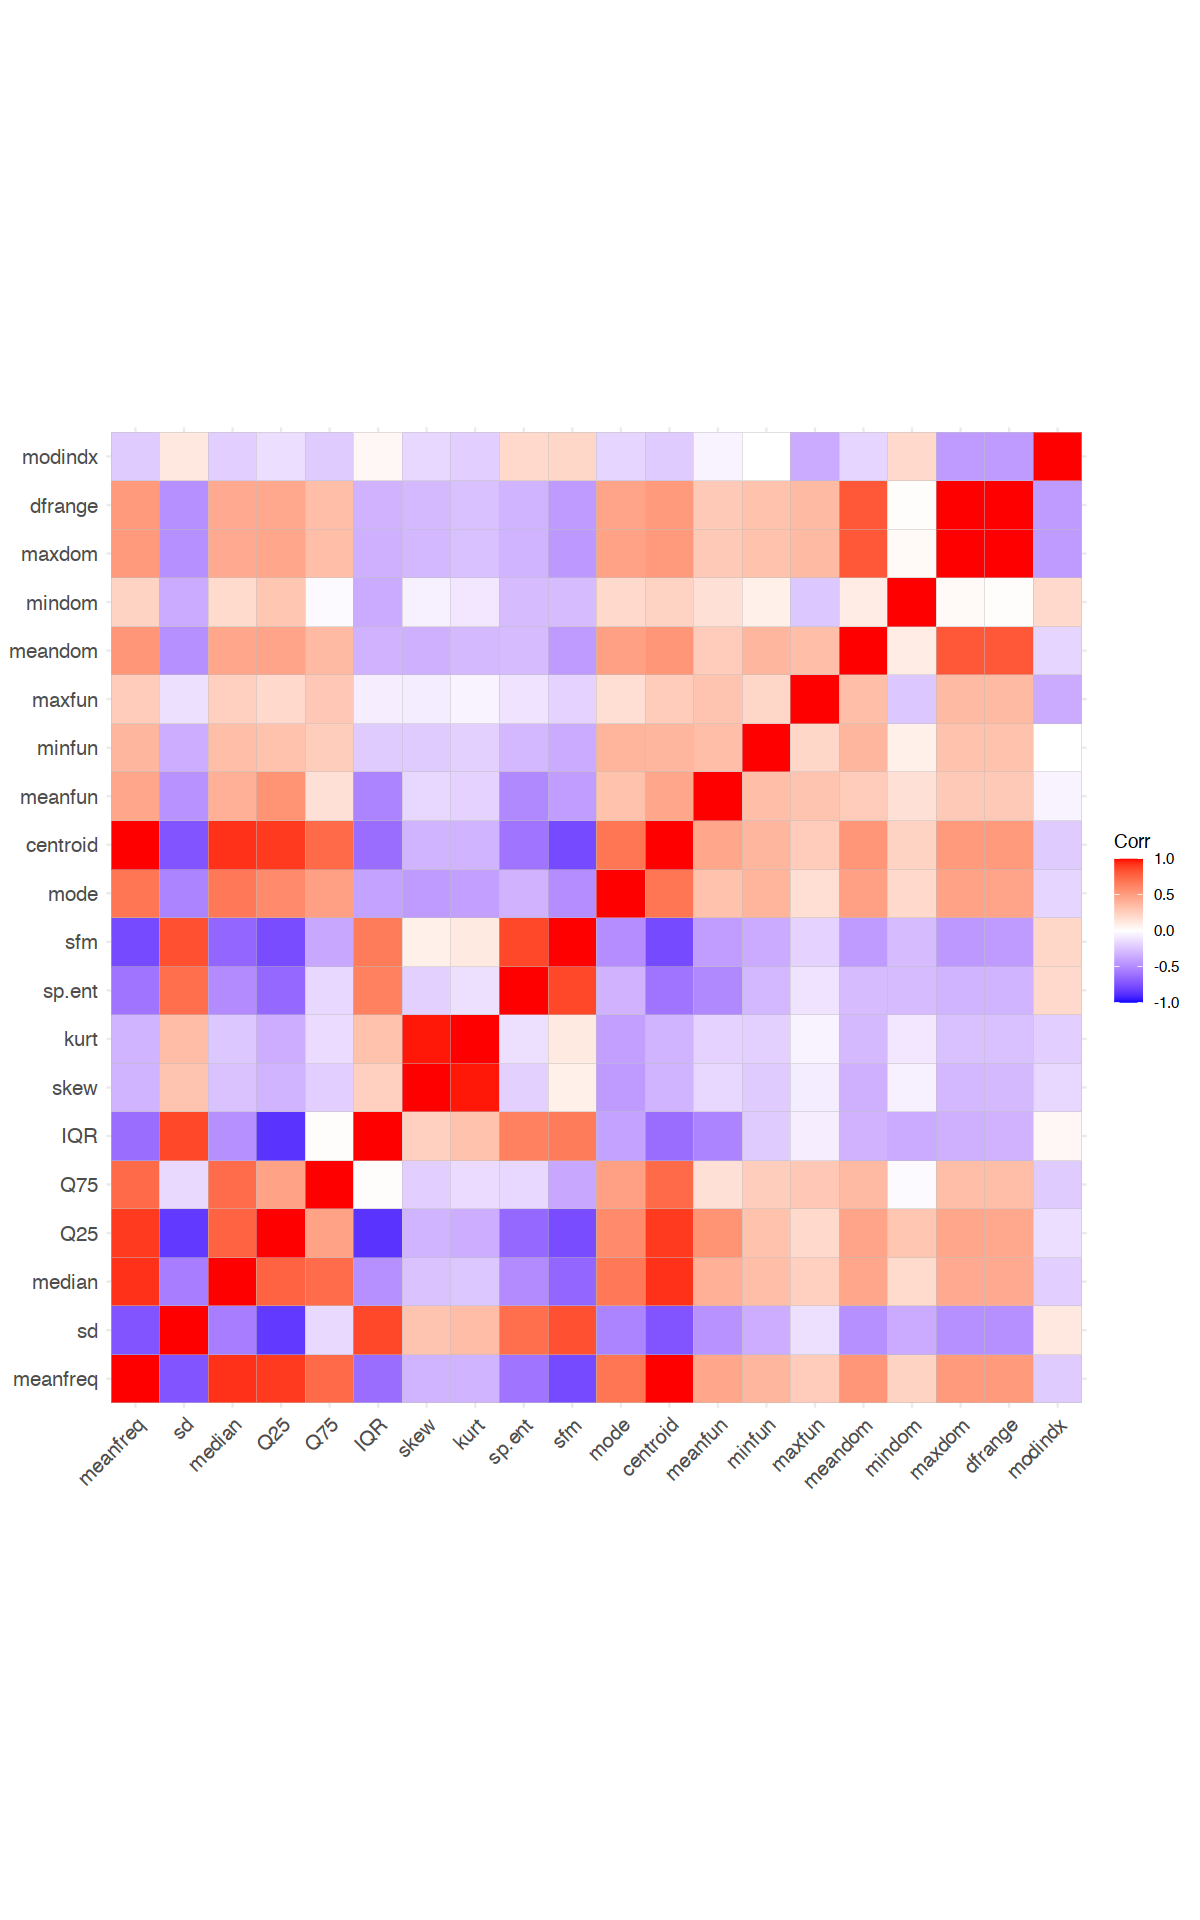

In [86]:
ggcorrplot(cor(v))

In [84]:
pca_hearing = prcomp(v, center=TRUE, scale=TRUE)

Warning message:
“ggrepel: 3115 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


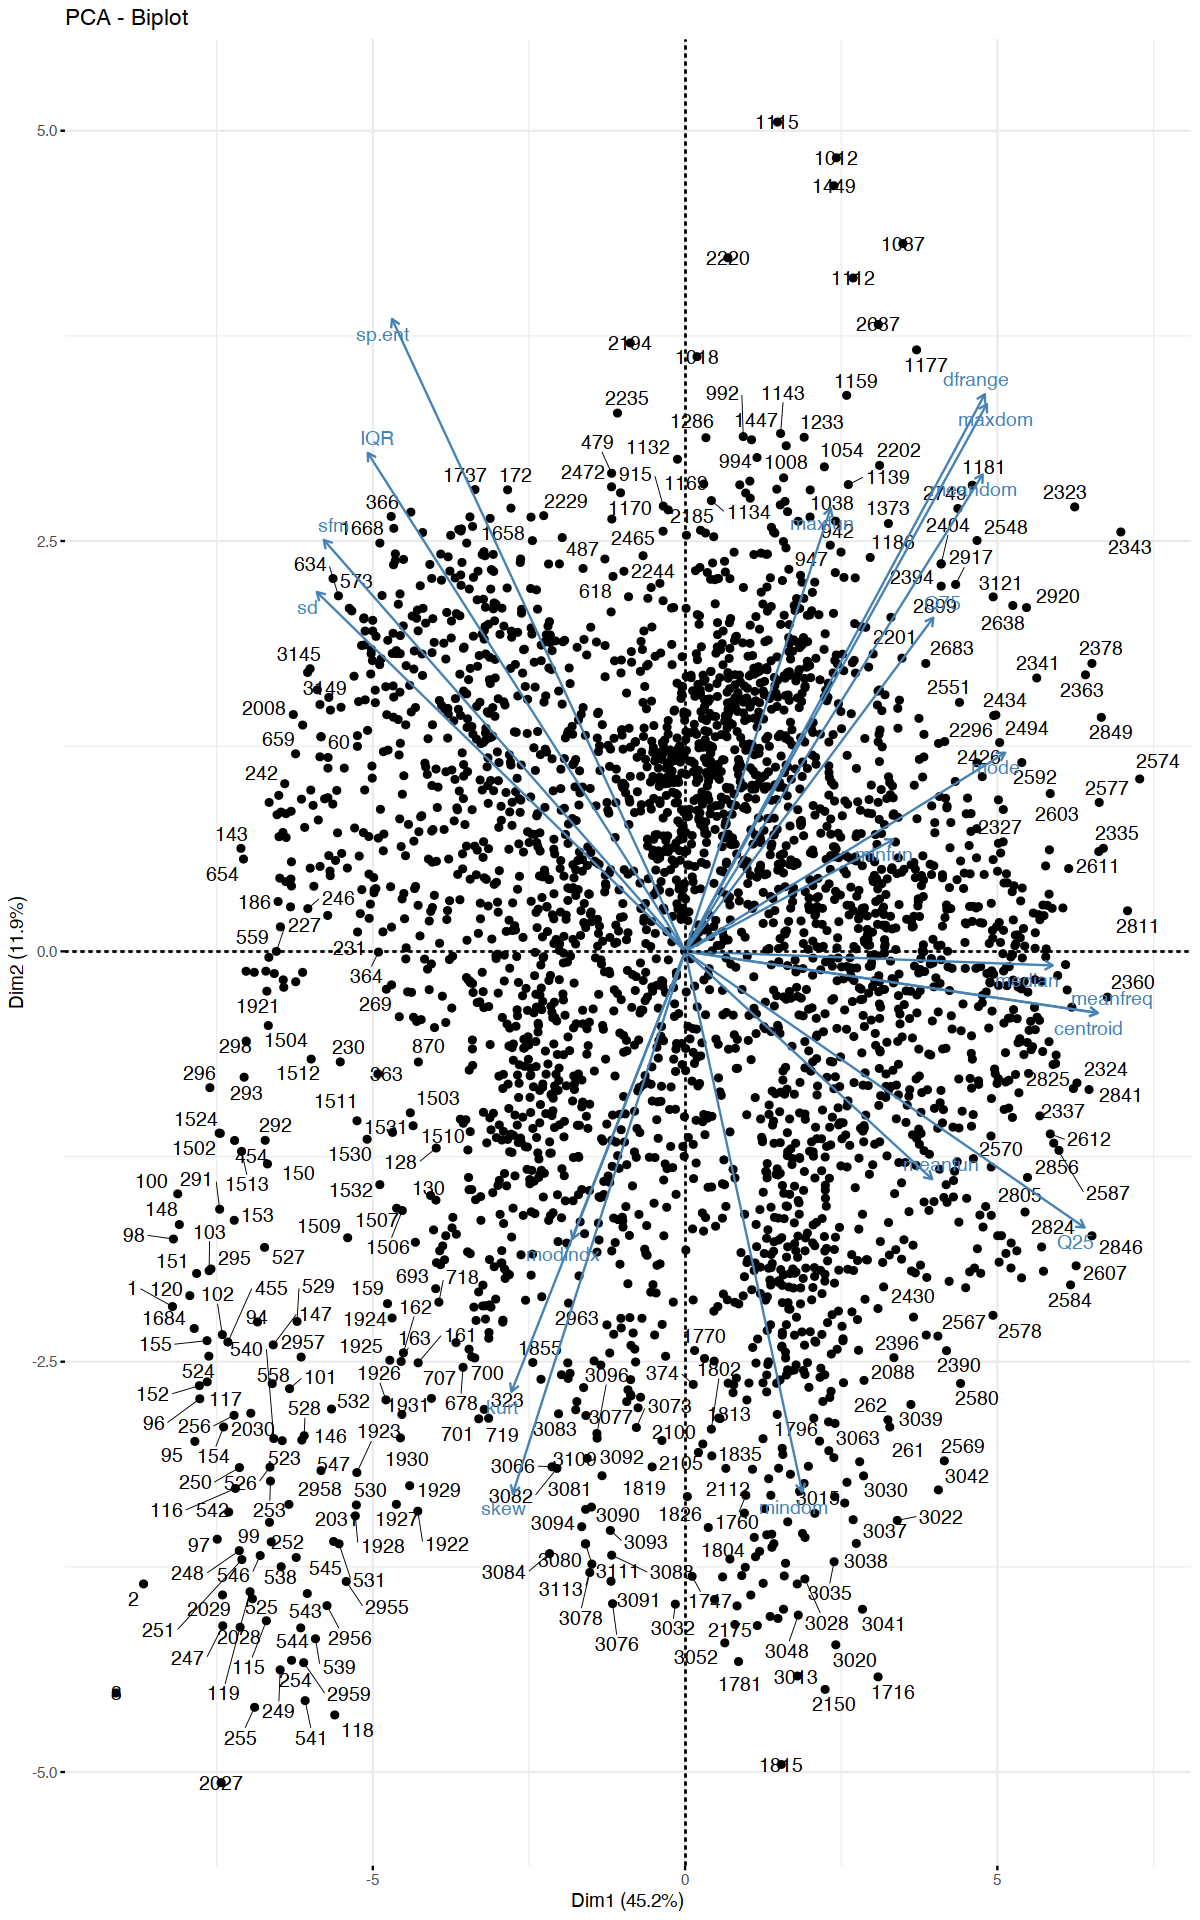

In [88]:
factoextra::fviz_pca_biplot(pca_hearing, repel=TRUE)

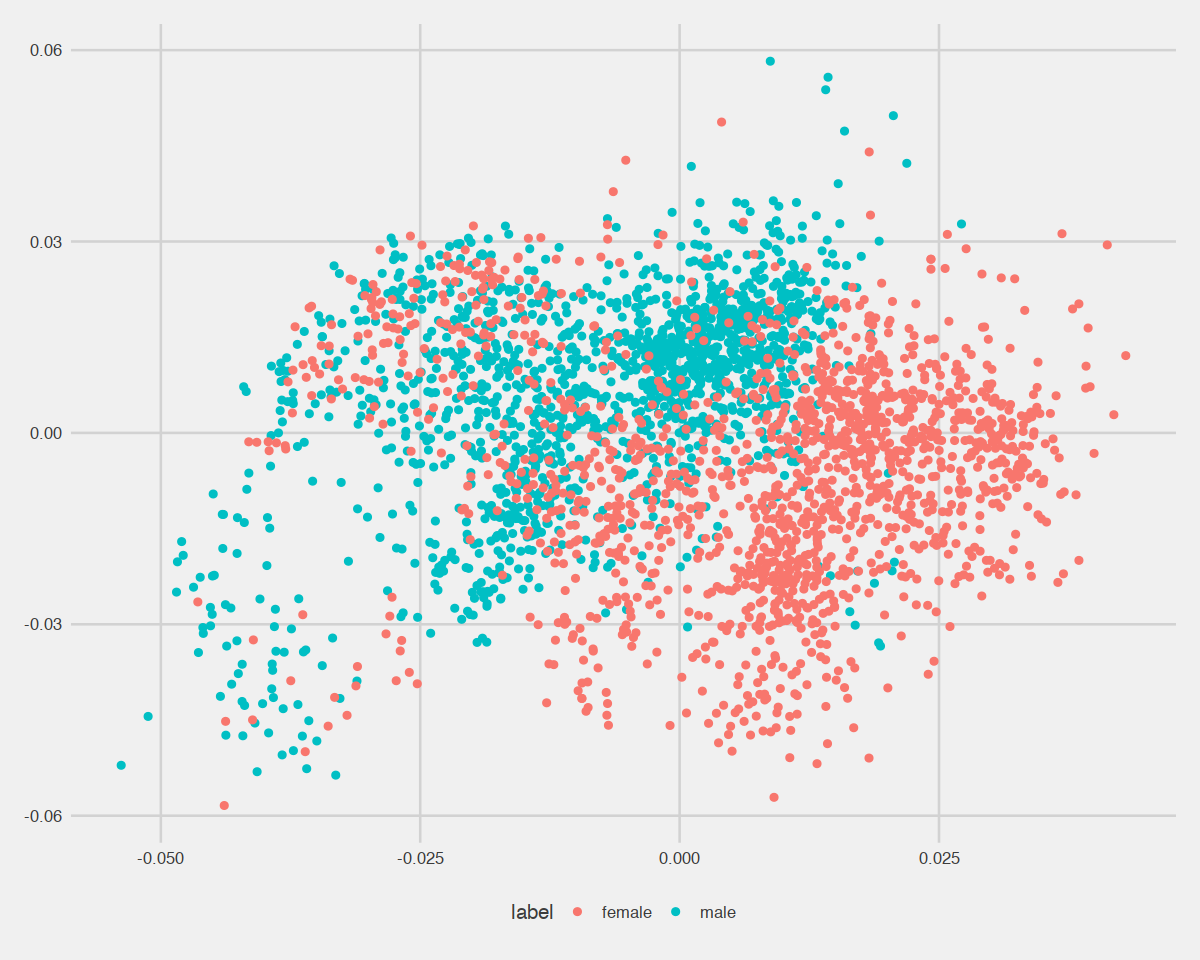

In [124]:
options(repr.plot.width=10, repr.plot.height=8)
autoplot(pca_hearing, data = voices, colour = 'label') + theme_fivethirtyeight()

In [115]:
voices

meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,⋯,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.05978098,0.06424127,0.03202691,0.015071489,0.09019344,0.07512195,12.8634618,274.402906,0.8933694,0.4919178,⋯,0.05978098,0.08427911,0.01570167,0.2758621,0.007812500,0.0078125,0.0078125,0.0000000,0.00000000,male
0.06600874,0.06731003,0.04022873,0.019413867,0.09266619,0.07325232,22.4232854,634.613855,0.8921932,0.5137238,⋯,0.06600874,0.10793655,0.01582591,0.2500000,0.009014423,0.0078125,0.0546875,0.0468750,0.05263158,male
0.07731550,0.08382942,0.03671846,0.008701057,0.13190802,0.12320696,30.7571546,1024.927705,0.8463891,0.4789050,⋯,0.07731550,0.09870626,0.01565558,0.2711864,0.007990057,0.0078125,0.0156250,0.0078125,0.04651163,male
0.15122809,0.07211059,0.15801119,0.096581728,0.20795525,0.11137352,1.2328313,4.177296,0.9633225,0.7272318,⋯,0.15122809,0.08896485,0.01779755,0.2500000,0.201497396,0.0078125,0.5625000,0.5546875,0.24711908,male
0.13512039,0.07914610,0.12465623,0.078720218,0.20604493,0.12732471,1.1011737,4.333713,0.9719551,0.7835681,⋯,0.13512039,0.10639784,0.01693122,0.2666667,0.712812500,0.0078125,5.4843750,5.4765625,0.20827389,male
0.13278641,0.07955687,0.11908985,0.067957993,0.20959160,0.14163361,1.9325624,8.308895,0.9631813,0.7383070,⋯,0.13278641,0.11013192,0.01711230,0.2539683,0.298221983,0.0078125,2.7265625,2.7187500,0.12515964,male
0.15076233,0.07446321,0.16010638,0.092898936,0.20571809,0.11281915,1.5306432,5.987498,0.9675731,0.7626377,⋯,0.15076233,0.10594452,0.02622951,0.2666667,0.479619565,0.0078125,5.3125000,5.3046875,0.12399186,male
0.16051433,0.07676688,0.14433678,0.110532168,0.23196187,0.12142971,1.3971564,4.766611,0.9592546,0.7198579,⋯,0.16051433,0.09305243,0.01775805,0.1441441,0.301339286,0.0078125,0.5390625,0.5312500,0.28393665,male
0.14223942,0.07801846,0.13858744,0.088206278,0.20858744,0.12038117,1.0997462,4.070284,0.9707229,0.7709921,⋯,0.14223942,0.09672895,0.01795735,0.2500000,0.336476293,0.0078125,2.1640625,2.1562500,0.14827202,male
